In [17]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("GPU name:", torch.cuda.get_device_name(torch.cuda.current_device()) if torch.cuda.is_available() else "No GPU found")

CUDA available: True
GPU count: 1
Current device: 0
GPU name: NVIDIA GeForce RTX 3050 Laptop GPU


In [1]:
import pandas as pd
df = pd.read_csv("../Cleaned data/final_email_dataset_clipped.csv")

In [4]:
df.head()

,clean_text,category,auto_category,auto_urgency,email_length
0,Traveling to have a business meeting takes the...,unknown,other,low,783
1,test successful. way to go!!!,unknown,other,low,30
2,"Randy,\n Can you send me a schedule of the sal...",unknown,request,medium,185
3,Let's shoot for Tuesday at 11:45.,unknown,other,low,33
4,"Greg,\n How about either next Tuesday or Thurs...",unknown,other,low,57


Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['auto_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 402004
Test set size: 100501


TF - IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( 
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF test data shape:", X_test_tfidf.shape)

TF-IDF training data shape: (402004, 5000)
TF-IDF test data shape: (100501, 5000)


In [6]:
import joblib
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")
print("TF-IDF vectorizer saved to models/tfidf_vectorizer.pkl")

TF-IDF vectorizer saved to models/tfidf_vectorizer.pkl


Initial Status of baseline models - logistic regression & naive bayes

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)
print("Logistic Regression model trained.")

Logistic Regression model trained.


In [8]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
print("Naive Bayes model trained.")

Naive Bayes model trained.


In [9]:
from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test_tfidf)
y_pred_nb = nb.predict(X_test_tfidf)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

print("Naive Bayes Report")
print(classification_report(y_test, y_pred_nb))


Logistic Regression Report
              precision    recall  f1-score   support

   complaint       0.55      0.94      0.70      3417
    feedback       0.62      0.89      0.73     12122
         ham       0.61      0.94      0.74       522
       other       0.82      0.94      0.88     28746
     request       0.95      0.73      0.83     55605
        spam       0.19      0.94      0.32        89

    accuracy                           0.82    100501
   macro avg       0.62      0.90      0.70    100501
weighted avg       0.86      0.82      0.82    100501

Naive Bayes Report
              precision    recall  f1-score   support

   complaint       0.45      0.20      0.27      3417
    feedback       0.48      0.24      0.32     12122
         ham       0.76      0.70      0.73       522
       other       0.80      0.33      0.47     28746
     request       0.64      0.93      0.76     55605
        spam       0.19      0.43      0.26        89

    accuracy                   

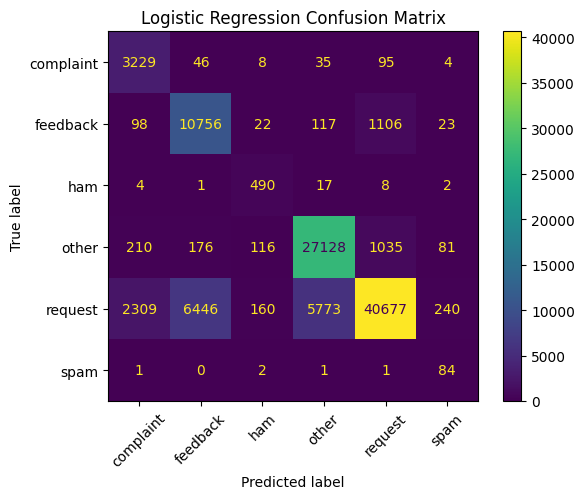

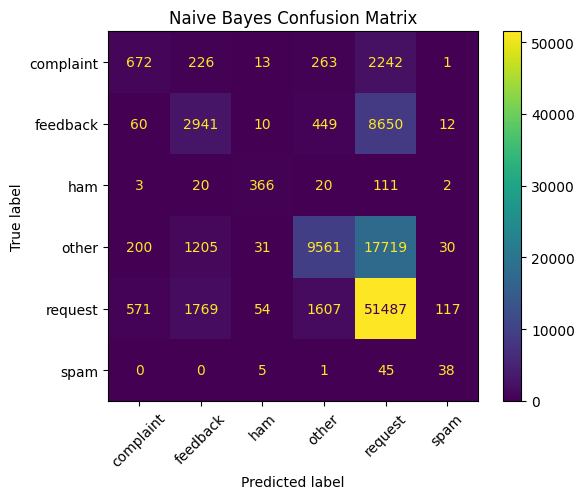

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test_tfidf, y_test, xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()
ConfusionMatrixDisplay.from_estimator(nb, X_test_tfidf, y_test, xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Making further improvements in Logistic Regression

In [2]:
df_copy = df.copy()

In [3]:
df_copy['auto_category'] = df_copy['auto_category'].replace('ham', 'other')

In [4]:
from sklearn.model_selection import train_test_split

X = df_copy['clean_text']
y = df_copy['auto_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 402004
Test set size: 100501


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( 
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF test data shape:", X_test_tfidf.shape)

TF-IDF training data shape: (402004, 5000)
TF-IDF test data shape: (100501, 5000)


In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)
print("Logistic Regression model trained.")

Logistic Regression model trained.


In [7]:
from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

   complaint       0.56      0.95      0.70      3418
    feedback       0.61      0.89      0.73     12122
       other       0.82      0.94      0.88     29267
     request       0.95      0.73      0.83     55605
        spam       0.18      0.88      0.30        89

    accuracy                           0.82    100501
   macro avg       0.62      0.88      0.69    100501
weighted avg       0.86      0.82      0.83    100501



In [8]:
import joblib

joblib.dump(lr, "logistic_regression_email_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model retrained and saved correctly")


✅ Model retrained and saved correctly


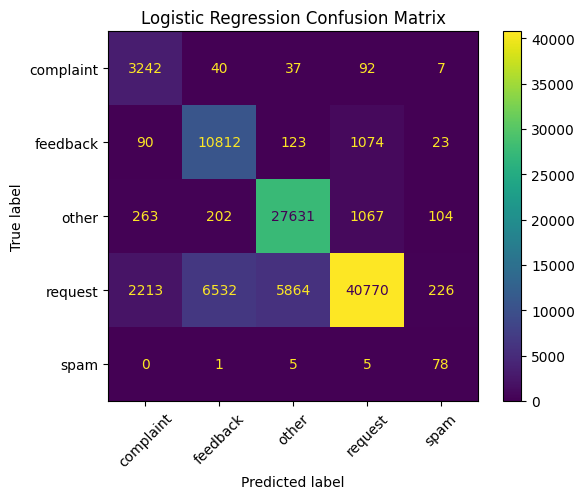

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test_tfidf, y_test, xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()